In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [ ]:
df=pd.read_csv("Produits.csv",encoding='ISO-8859-1')

In [ ]:
df['nb_reviews'] = df['nb_reviews'].fillna(0)

In [ ]:
df[df["nb_reviews"]==0]

,title,price_before,price_after,rating,seller_evaluation,shipping_speed,nb_reviews,availability,categorie
2,Casque Gamer PC LED avec Micro HD : Super Bass...,248.00,139.0,0.0,1.00,Excellent,0.0,Disponible,Électronique
5,Razer Casque Sans Fil Barracuda RZ04-03790100-...,2199.00,1849.0,0.0,1.00,Excellent,0.0,2 articles seulement,Électronique
13,"Now Foods GTF Chrome (Chromium), 200 mcg, 250 ...",594.51,399.0,0.0,0.86,Excellent,0.0,2 articles seulement,Beauté
16,Elit MARMITE POUR LES PÂTES,350.00,290.0,0.0,0.90,Bon,0.0,Quelques articles restants,Maison
30,Casque Gamer PC LED avec Micro HD : Super Bass...,248.00,139.0,0.0,1.00,Excellent,0.0,Disponible,Électronique
33,Razer Casque Sans Fil Barracuda RZ04-03790100-...,2199.00,1849.0,0.0,1.00,Excellent,0.0,2 articles seulement,Électronique
37,Sony Casque-micro sans fil PS5 Pulse 3D Noir,1699.00,1399.0,0.0,0.86,Excellent,0.0,1 articles seulement,Électronique
39,Ge Souris Wired Gaming RGB - Noir,220.00,165.0,0.0,1.00,Excellent,0.0,Quelques articles restants,Électronique
40,Data Frog 4K HD Console de jeu vidéo 2.4G Doub...,698.00,319.0,0.0,0.66,Excellent,0.0,4 articles seulement,Électronique
42,Xtrike Clavier Gamer lumineux multicolore KB-3...,200.00,179.0,0.0,0.80,Excellent,0.0,2 articles seulement,Électronique


In [ ]:
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
df['availability']=pd.DataFrame(imputer.fit_transform(df[['availability']]))

In [ ]:
df["shipping_speed"]=pd.DataFrame(imputer.fit_transform(df[["shipping_speed"]]))

In [ ]:
df[df.isna().any(axis=1)]

,title,price_before,price_after,rating,seller_evaluation,shipping_speed,nb_reviews,availability,categorie


In [ ]:
X = df[['rating','price_before','seller_evaluation','nb_reviews' ]]
y = df['price_after']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_lin = r2_score(y_test, y_pred)
print(y_pred)
print(y_test)
print(f"accuracy:{r2_lin}")

[ 185.87384794  291.98571803  301.03442264  102.86497014  509.25735687
  296.79715992  317.51722829 1501.19078237  158.68003676  187.18581169
  436.41714095  398.36927296  221.68856204  509.25735687]
46     145.0
16     290.0
4      442.0
9       55.0
28     245.0
41     315.0
58     323.0
5     1849.0
61     290.0
12     150.0
25     329.0
65     550.0
47     149.0
0      245.0
Name: price_after, dtype: float64
accuracy:0.8637963857158131


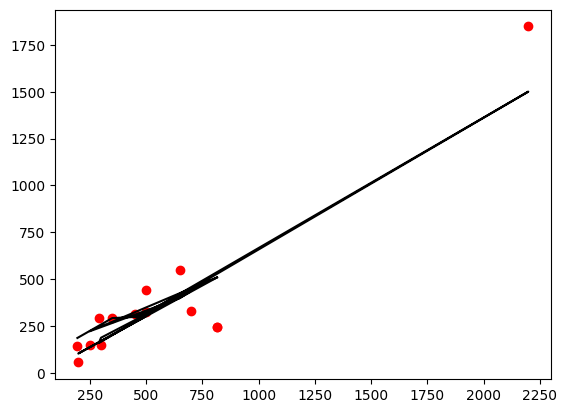

In [ ]:
plt.scatter(X_test['price_before'],y_test,color='red')
plt.plot(X_test['price_before'],y_pred,color='black')

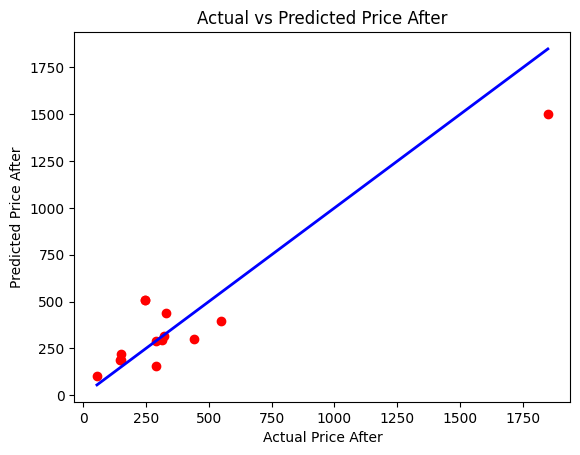

In [ ]:
plt.scatter(y_test, y_pred, color='red')  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=2)  # Ideal line (y=x)
plt.xlabel('Actual Price After')
plt.ylabel('Predicted Price After')
plt.title('Actual vs Predicted Price After')
plt.show()

In [ ]:
X

,rating,price_before,seller_evaluation,nb_reviews
0,3.7,816.00,0.80,62.0
1,5.0,149.99,0.86,1.0
2,0.0,248.00,1.00,0.0
3,3.7,774.00,0.80,68.0
4,4.5,499.00,0.80,2.0
...,...,...,...,...
63,0.0,599.00,0.74,0.0
64,5.0,450.00,0.60,1.0
65,4.0,650.00,0.60,1.0
66,2.3,239.00,0.46,3.0


In [ ]:
y

,price_after
0,245.00
1,119.99
2,139.00
3,259.00
4,442.00
...,...
63,380.00
64,380.00
65,550.00
66,139.99


In [ ]:
# Linear Regression (Déjà fait)
print("Coefficient de détermination R^2 pour la Régression linéaire :", r2_lin)

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print("Coefficient de détermination R^2 pour le Random Forest Regressor :", r2_rf)

# K-Nearest Neighbors Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

print("Coefficient de détermination R^2 pour le K-Nearest Neighbors Regressor :", r2_knn)

# K-Nearest Neighbors Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

print("Coefficient de détermination R^2 pour le K-Nearest Neighbors Regressor :", r2_knn)

# Support Vector Regressor
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)
r2_svm = r2_score(y_test, y_pred_svm)
print("Coefficient de détermination R^2 pour le Support Vector Regressor :",r2_svm)

# Comparaison des modèles
r2_scores = {'Régression linéaire': r2_lin, 'Random Forest Regressor': r2_rf, 'K-Nearest Neighbors Regressor': r2_knn}
best_model = max(r2_scores, key=r2_scores.get)
print("Le meilleur modèle est :", best_model, "avec un score R^2 de :", r2_scores[best_model])

Coefficient de détermination R^2 pour la Régression linéaire : 0.8637963857158131
Coefficient de détermination R^2 pour le Random Forest Regressor : 0.9594048239240678
Coefficient de détermination R^2 pour le K-Nearest Neighbors Regressor : 0.8931854026892678
Coefficient de détermination R^2 pour le K-Nearest Neighbors Regressor : 0.8931854026892678
Coefficient de détermination R^2 pour le Support Vector Regressor : 0.8244225808900294
Le meilleur modèle est : Random Forest Regressor avec un score R^2 de : 0.9594048239240678
